# `0` **Import Libraries**

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense, Conv2D, MaxPool2D, Flatten ,Activation, MaxPooling2D,  Input
from keras.applications.resnet_v2 import ResNet50V2
from keras.callbacks import EarlyStopping
keras.utils.set_random_seed(1234)

##  **Load MNIST Dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### OneHotEncode Target Variable

In [ ]:
y_train =  keras.utils.to_categorical(y_train)
y_test  =  keras.utils.to_categorical(y_test)

### Preview the Images

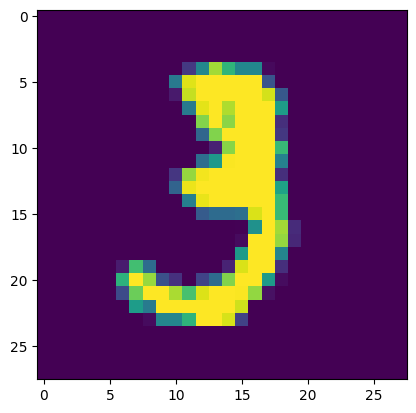

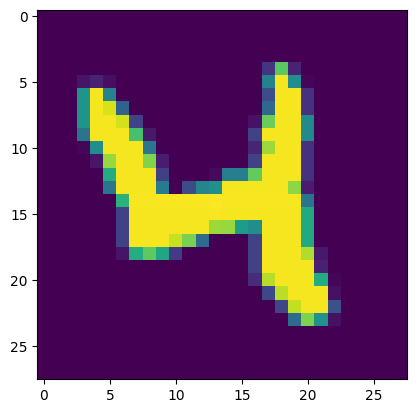

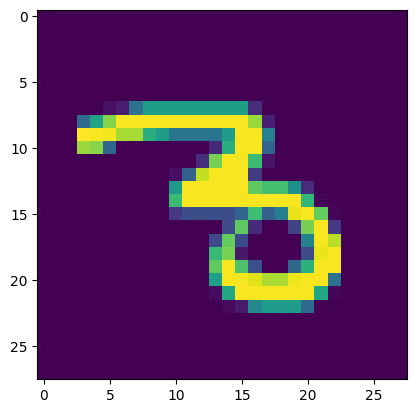

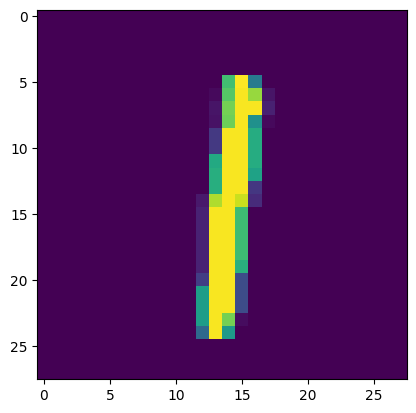

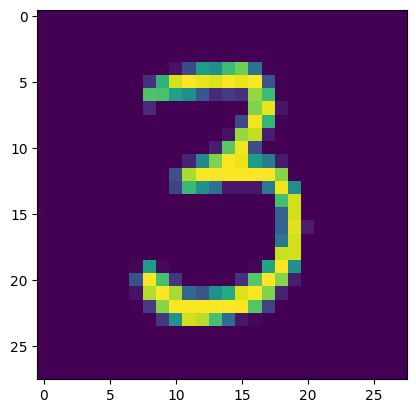

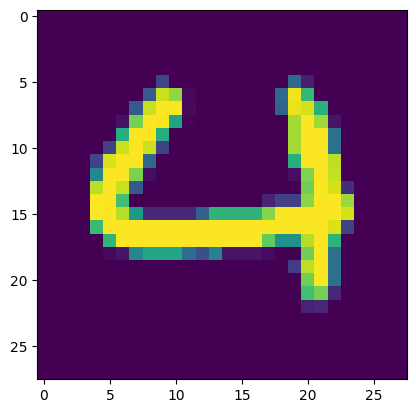

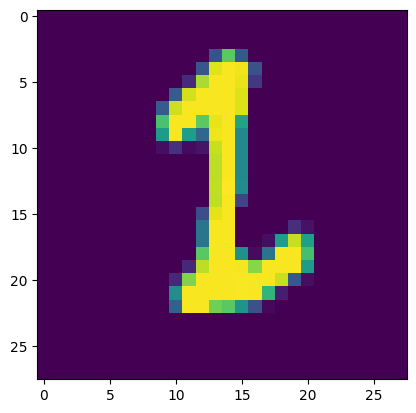

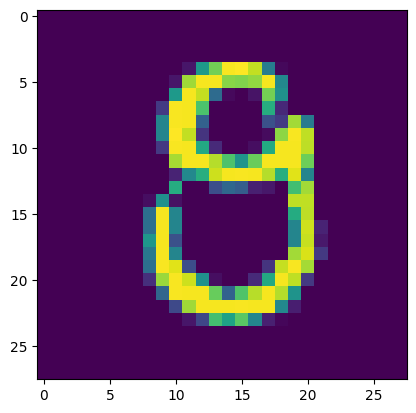

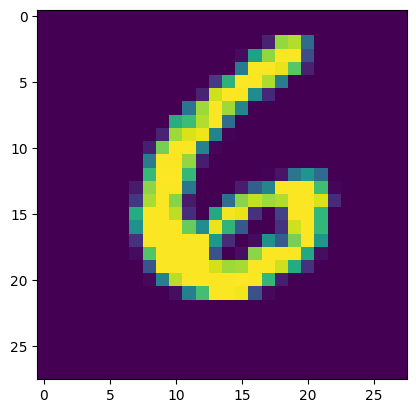

In [ ]:
sample= range (10,100,10)
for i in sample:
    plt.imshow(X_train[i])
    plt.show()

### Rescale Independent Features

In [ ]:
X_train =X_train / 255.
X_test  =X_test / 255.

## `+` Set Global Parameters

In [ ]:
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS      =  150

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [ ]:
model=Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('relu')))
model.add(Dense(128,activation=('relu')))
model.add(Dense(10,activation=('softmax')))
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8805 - loss: 0.4040 - val_accuracy: 0.9665 - val_loss: 0.1128
Epoch 2/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9680 - loss: 0.1020 - val_accuracy: 0.9653 - val_loss: 0.1239
Epoch 3/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9809 - loss: 0.0637 - val_accuracy: 0.9700 - val_loss: 0.1015
Epoch 4/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9841 - loss: 0.0475 - val_accuracy: 0.9748 - val_loss: 0.0910
Epoch 5/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0377 - val_accuracy: 0.9764 - val_loss: 0.0899
Epoch 6/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9890 - loss: 0.0309 - val_accuracy: 0.9790 - val_loss: 0.0910
Epoch 7/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9923 - loss: 0.0242 - val_accuracy: 0.9777 - val_loss: 0.1021
Epoch 8/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9917 - loss: 0.0254 - val_accu

#### Model Ealuation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9780 - loss: 0.1303
Loss: 0.10937398672103882
Accuracy: 0.9815999865531921


#### Result Visualization

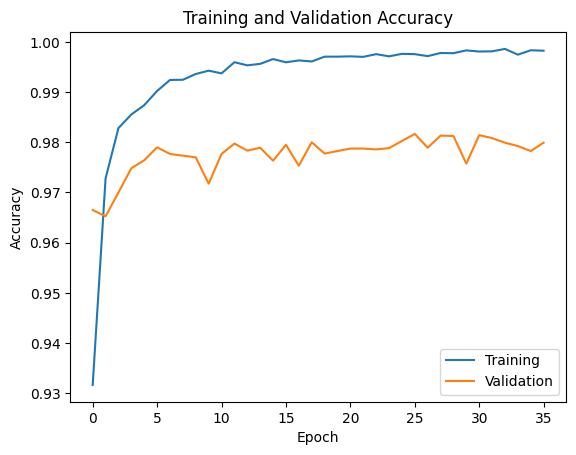

In [ ]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

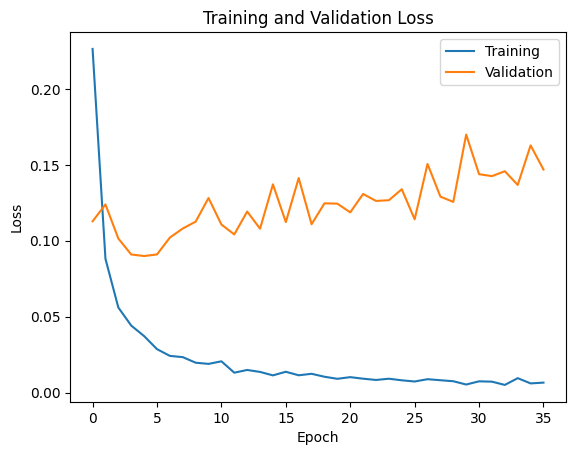

In [ ]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [ ]:
X_train =X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test =X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

In [ ]:
model=Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(15,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(20,(3,3),padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(10,(3,3),padding="same",activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 15)          │           4,335 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 5, 5, 20)            │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 2, 2, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 2, 2, 10)            │           1,810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 256)                 │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,867 (210.42 KB)

 Trainable params: 53,867 (210.42 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7570 - loss: 0.7465 - val_accuracy: 0.9573 - val_loss: 0.1492
Epoch 2/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9617 - loss: 0.1225 - val_accuracy: 0.9707 - val_loss: 0.0963
Epoch 3/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9746 - loss: 0.0835 - val_accuracy: 0.9756 - val_loss: 0.0843
Epoch 4/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9790 - loss: 0.0676 - val_accuracy: 0.9803 - val_loss: 0.0701
Epoch 5/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9830 - loss: 0.0554 - val_accuracy: 0.9782 - val_loss: 0.0782
Epoch 6/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9857 - loss: 0.0461 - val_accuracy: 0.9792 - val_loss: 0.0728
Epoch 7/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9872 - loss: 0.0404 - val_accuracy: 0.9786 - val_loss: 0.0773
Epoch 8/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9884 - loss: 0.0374 - val_accu

#### Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0667
Loss: 0.05391664430499077
Accuracy: 0.9876999855041504


#### Result Visualization

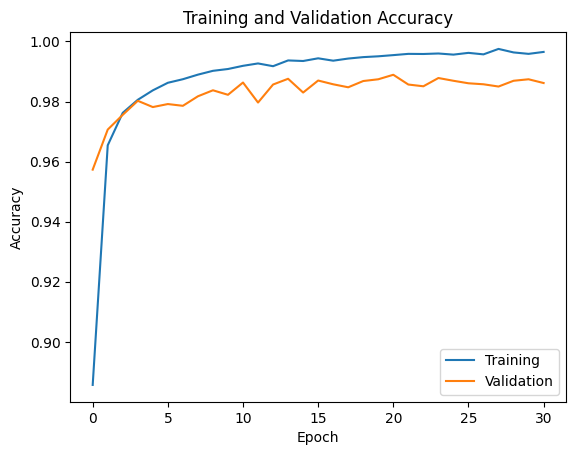

In [ ]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

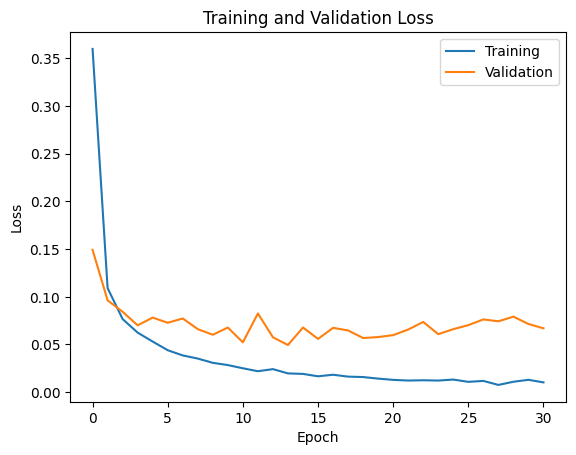

In [ ]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Trial no. 2

In [ ]:
model=Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(15,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(20,(3,3),padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(10,(3,3),padding="same",activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 11, 11, 15)          │           4,335 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 5, 5, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 5, 5, 20)            │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 2, 2, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 2, 2, 10)            │           1,810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 256)                 │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,867 (210.42 KB)

 Trainable params: 53,867 (210.42 KB)

 Non-trainable params: 0 (0.00 B)

#### Model Training

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15, callbacks=[early_stop])

Epoch 1/150
797/797 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7662 - loss: 0.7146 - val_accuracy: 0.9697 - val_loss: 0.1040
Epoch 2/150
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9658 - loss: 0.1085 - val_accuracy: 0.9722 - val_loss: 0.0950
Epoch 3/150
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9761 - loss: 0.0766 - val_accuracy: 0.9799 - val_loss: 0.0690
Epoch 4/150
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9799 - loss: 0.0607 - val_accuracy: 0.9797 - val_loss: 0.0711
Epoch 5/150
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9839 - loss: 0.0507 - val_accuracy: 0.9829 - val_loss: 0.0637
Epoch 6/150
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9853 - loss: 0.0453 - val_accuracy: 0.9847 - val_loss: 0.0544
Epoch 7/150
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9881 - loss: 0.0389 - val_accuracy: 0.9832 - val_loss: 0.0599
Epoch 8/150
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9882 - loss: 0.0380 - val_accu

#### Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9834 - loss: 0.0610
Loss: 0.04545263946056366
Accuracy: 0.9872999787330627


#### Result Visualization

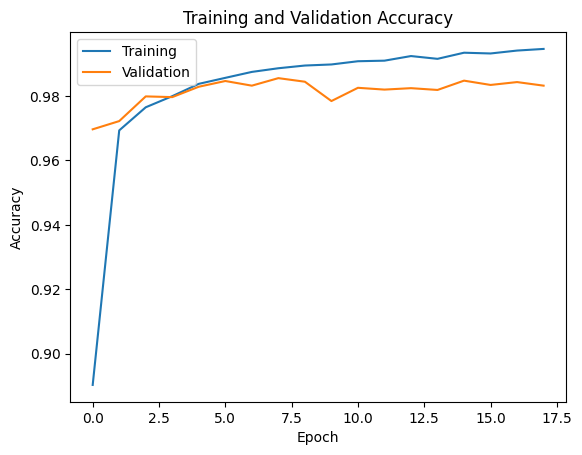

In [ ]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

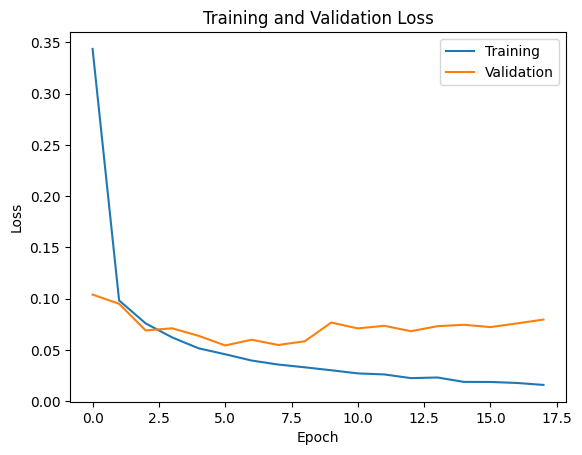

In [ ]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# `00` **introduction**

- Design LSTM learning model to classify hand-written digits (MNIST dataset).
- Important Notes:
  - Image Size: $28\times28$
  - Use $32$ units in the LSTM layer and $15\%$ recurrent dropout.
  - Use Categorical Cross Entropy for the loss calculation, `Adam` for optimization and `accuracy` for metrics.

# `01` Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, LSTM, ConvLSTM1D, Rescaling, Reshape, Flatten
from tensorflow.keras.datasets import mnist
from keras.callbacks import EarlyStopping


# `+` Seed Value

In [2]:
SEED = 907

# `02` Load & Preprocess MNIST Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [5]:
y_train =  keras.utils.to_categorical(y_train)
y_test  =  keras.utils.to_categorical(y_test)

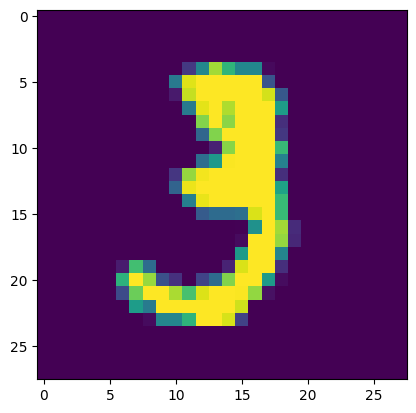

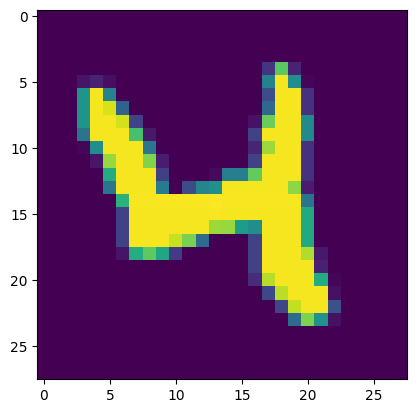

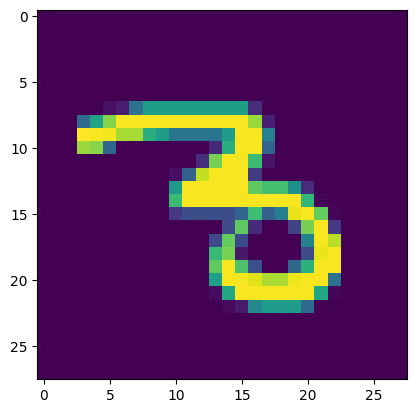

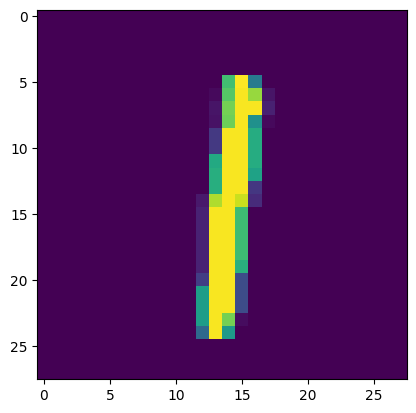

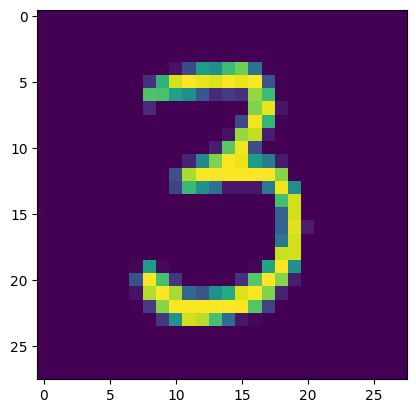

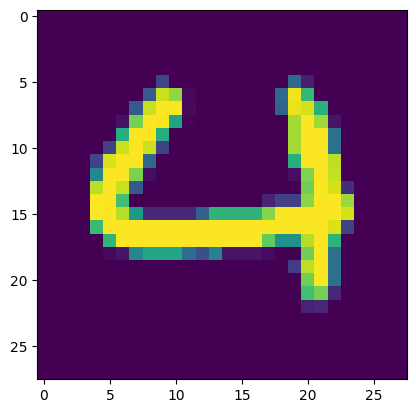

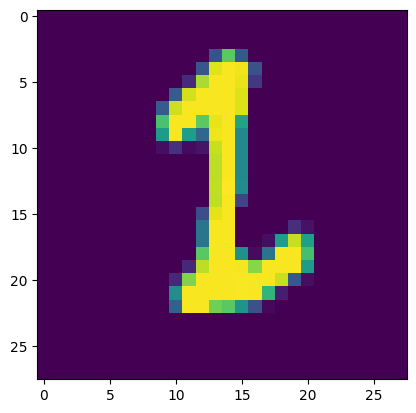

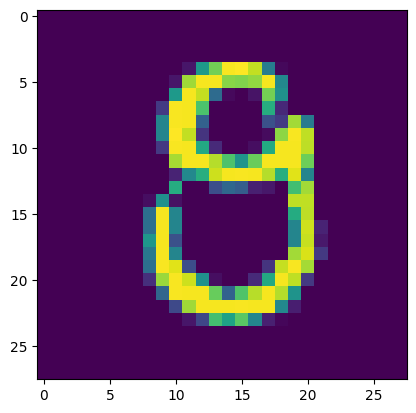

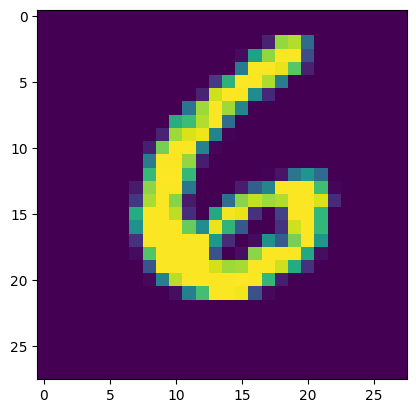

In [6]:
sample= range (10,100,10)
for i in sample:
    plt.imshow(X_train[i])
    plt.show()

##  Set Global Parameters

In [7]:
BATCH_SIZE  = 64
EPOCHS      = 100
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

## `i` Model Design

In [8]:
inputs = Input((28,28))

lstm = Rescaling(scale=1/255.)(inputs)
lstm = LSTM(32,recurrent_dropout=0.2)(lstm)
outputs=Dense(10,'softmax')(lstm)

In [9]:
model = keras.Model(inputs,outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,138 (31.79 KB)

 Trainable params: 8,138 (31.79 KB)

 Non-trainable params: 0 (0.00 B)

## `ii` Model Compilation & Training

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.4528 - loss: 1.6034 - val_accuracy: 0.8406 - val_loss: 0.5356
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.8068 - loss: 0.6061 - val_accuracy: 0.9143 - val_loss: 0.2823
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.8847 - loss: 0.3788 - val_accuracy: 0.9395 - val_loss: 0.2008
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9107 - loss: 0.2928 - val_accuracy: 0.9526 - val_loss: 0.1599
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9304 - loss: 0.2370 - val_accuracy: 0.9582 - val_loss: 0.1379
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9374 - loss: 0.2072 - val_accuracy: 0.9624 - val_loss: 0.1256
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.9450 - loss: 0.1844 - val_accuracy: 0.9668 - val_loss: 0.1121
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9495 - loss: 0

## `iii` Model Evaluation

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9808 - loss: 0.0614
Loss: 0.049179911613464355
Accuracy: 0.9840999841690063


## `iv` Result Visualization

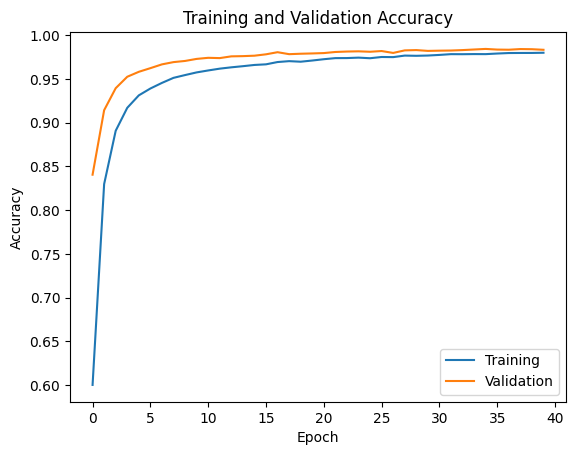

In [13]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

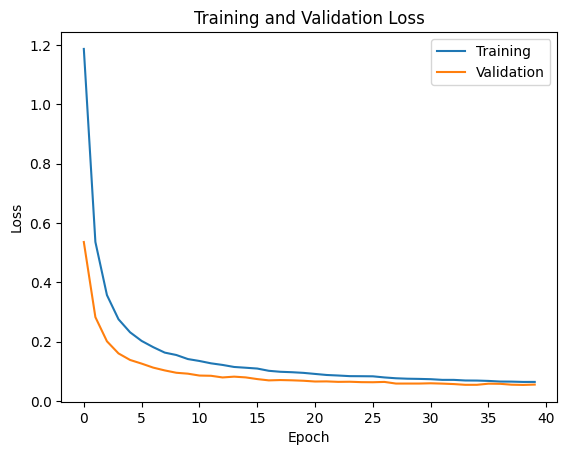

In [14]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


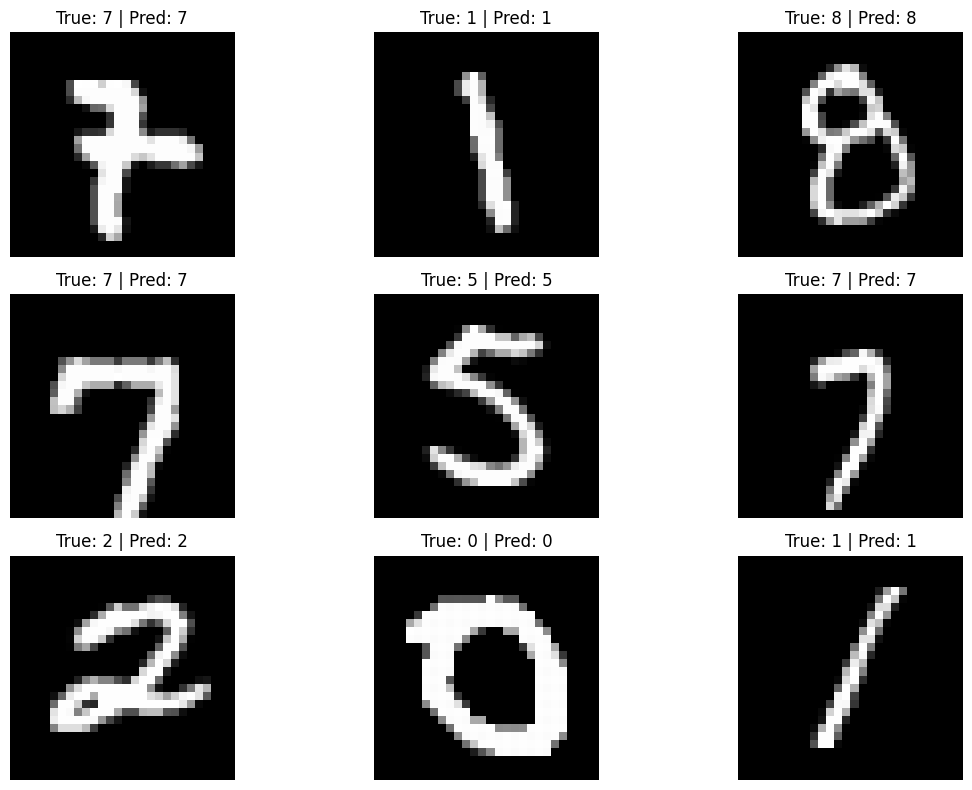

In [20]:
n = 9
samples_indices = np.random.choice(len(X_test), size=n, replace=False)
samples = X_test[samples_indices]
true_labels = np.argmax(y_test[samples_indices], axis=1)

predicted_probs = model.predict(samples)
predicted_labels = np.argmax(predicted_probs, axis=1)

plt.figure(figsize=(15, 10))
for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[i], cmap='gray')
    plt.title(f"True: {true_labels[i]} | Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [21]:
inputs = keras.Input(shape=(28, 28))

lstm = Rescaling(scale=1/255)(inputs)
lstm = LSTM(64,recurrent_dropout=0.15)(lstm)
lstm = LSTM(32)(lstm)
outputs = Dense(10,'softmax')(lstm)

In [22]:
model = keras.Model(inputs,outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 28, 64)         │        23,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,554 (142.79 KB)

 Trainable params: 36,554 (142.79 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 73s 92ms/step - accuracy: 0.5901 - loss: 1.1993 - val_accuracy: 0.9302 - val_loss: 0.2341
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.9175 - loss: 0.2722 - val_accuracy: 0.9597 - val_loss: 0.1324
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 92ms/step - accuracy: 0.9508 - loss: 0.1667 - val_accuracy: 0.9669 - val_loss: 0.1092
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.9621 - loss: 0.1264 - val_accuracy: 0.9753 - val_loss: 0.0854
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.9690 - loss: 0.1050 - val_accuracy: 0.9797 - val_loss: 0.0695
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.9739 - loss: 0.0875 - val_accuracy: 0.9819 - val_loss: 0.0632
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.9777 - loss: 0.0756 - val_accuracy: 0.9838 - val_loss: 0.0543
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.9807 - loss: 0

## `iii` Model Evaluation

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9889 - loss: 0.0387
Loss: 0.03188268467783928
Accuracy: 0.9909999966621399


## `iv` Result Visualization

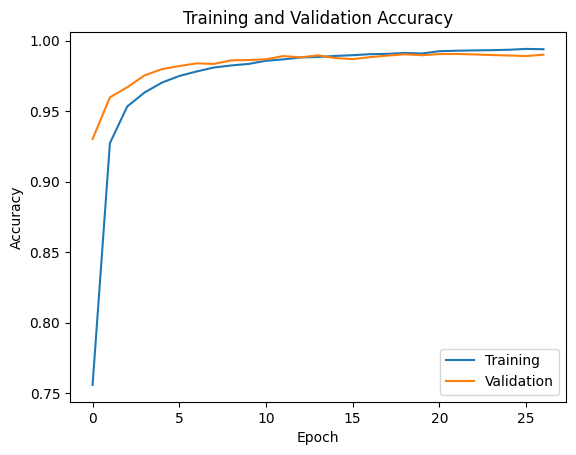

In [28]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

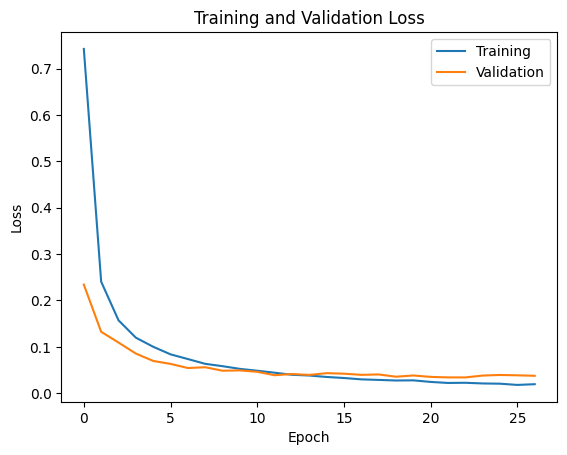

In [29]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


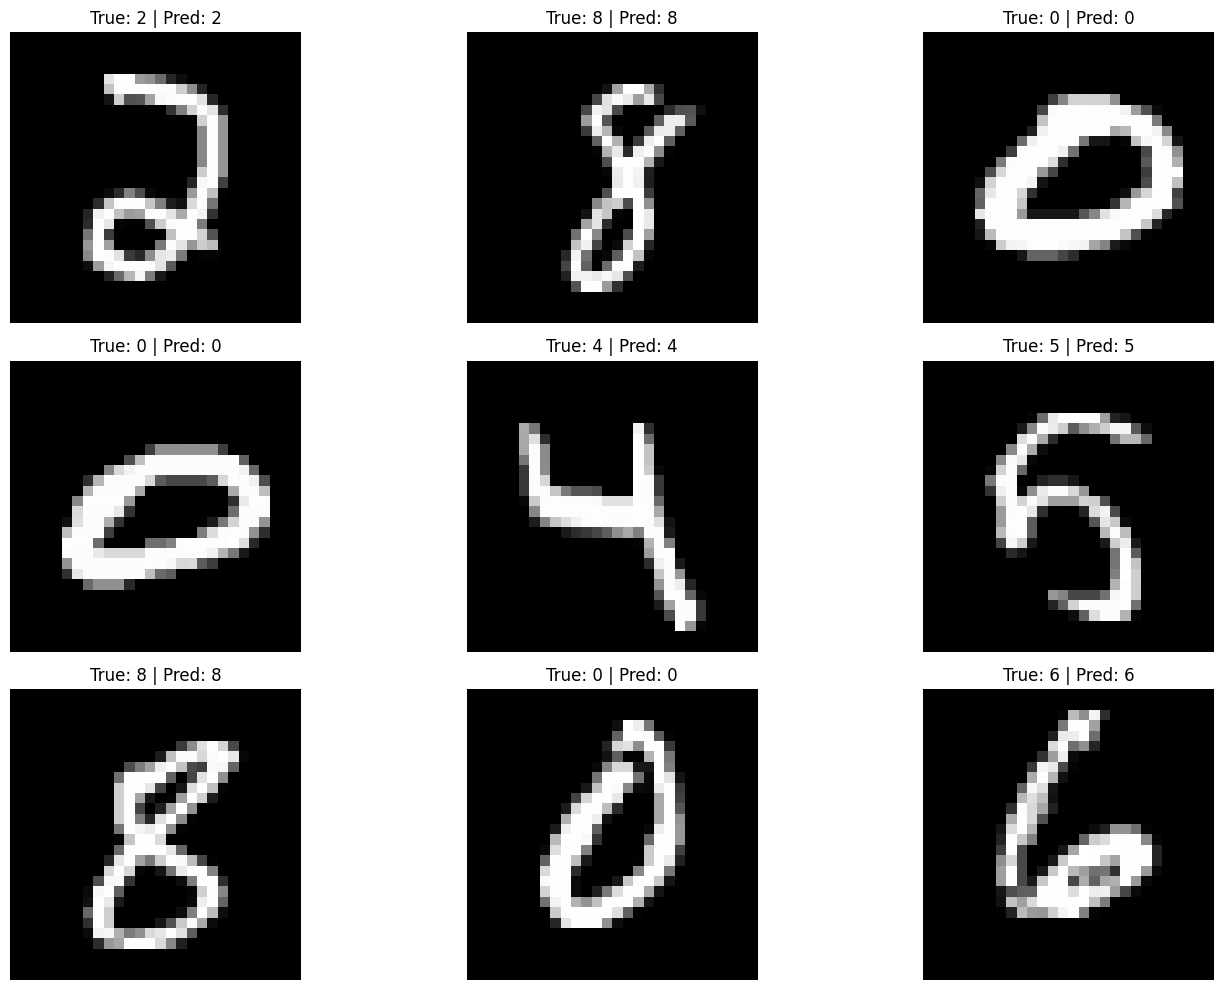

In [32]:
n = 9
samples_indices = np.random.choice(len(X_test), size=n, replace=False)
samples = X_test[samples_indices]
true_labels = np.argmax(y_test[samples_indices], axis=1)

predicted_probs = model.predict(samples)
predicted_labels = np.argmax(predicted_probs, axis=1)

plt.figure(figsize=(15, 10))
for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[i], cmap='gray')
    plt.title(f"True: {true_labels[i]} | Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

------------------------------
- `ConvLSTM1D` layer instead of `LSTM`:
  - Kernel Size -> Try $1$ and $3$. Which is better?
  - Padding = `same` or `valid` -> Is there a big difference?

------------------------------

In [37]:
def build_ConvLSTM1D_model(kernel_size, padding):
    inputs = Input(shape=(28, 28))
    x = Rescaling(scale=1.0 / 255)(inputs)
    x = Reshape((28, 28, 1))(x)
    x = ConvLSTM1D(filters=32, kernel_size=kernel_size, padding=padding)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

### **Kernal size = 1**
**Padding same**

In [38]:
model = build_ConvLSTM1D_model(kernel_size=1, padding='same')
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_1 (ConvLSTM1D)      │ (None, 28, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,458 (470.54 KB)

 Trainable params: 120,458 (470.54 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.6817 - loss: 0.9547 - val_accuracy: 0.9409 - val_loss: 0.1942
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9425 - loss: 0.1830 - val_accuracy: 0.9553 - val_loss: 0.1461
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9599 - loss: 0.1312 - val_accuracy: 0.9603 - val_loss: 0.1277
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9664 - loss: 0.1036 - val_accuracy: 0.9610 - val_loss: 0.1252
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9741 - loss: 0.0828 - val_accuracy: 0.9693 - val_loss: 0.1007
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9775 - loss: 0.0693 - val_accuracy: 0.9702 - val_loss: 0.1008
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9822 - loss: 0.0559 - val_accuracy: 0.9719 - val_loss: 0.0933
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9839 - loss: 0.

## `iii` Model Evaluation

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9723 - loss: 0.1272
Loss: 0.09422069042921066
Accuracy: 0.9785000085830688


## `iv` Result Visualization

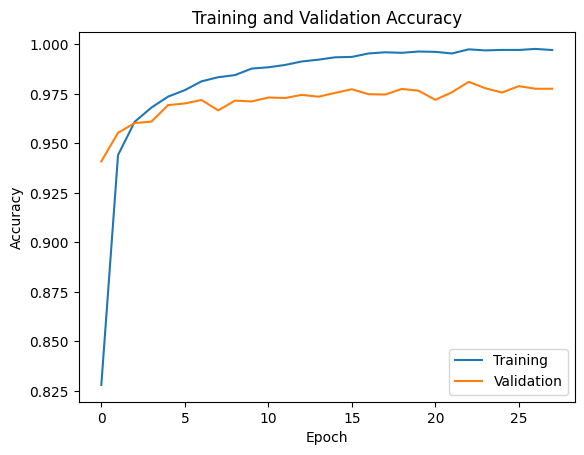

In [44]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

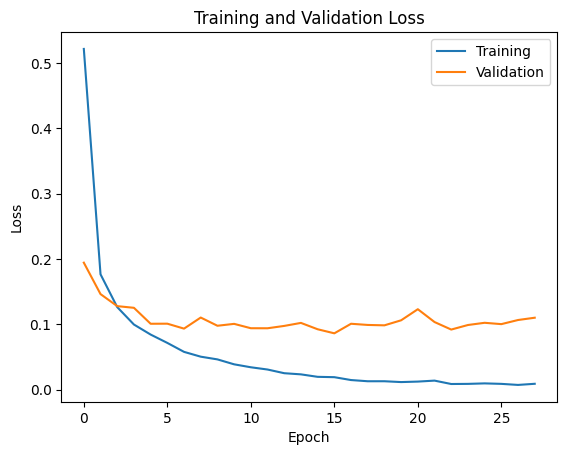

In [45]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step


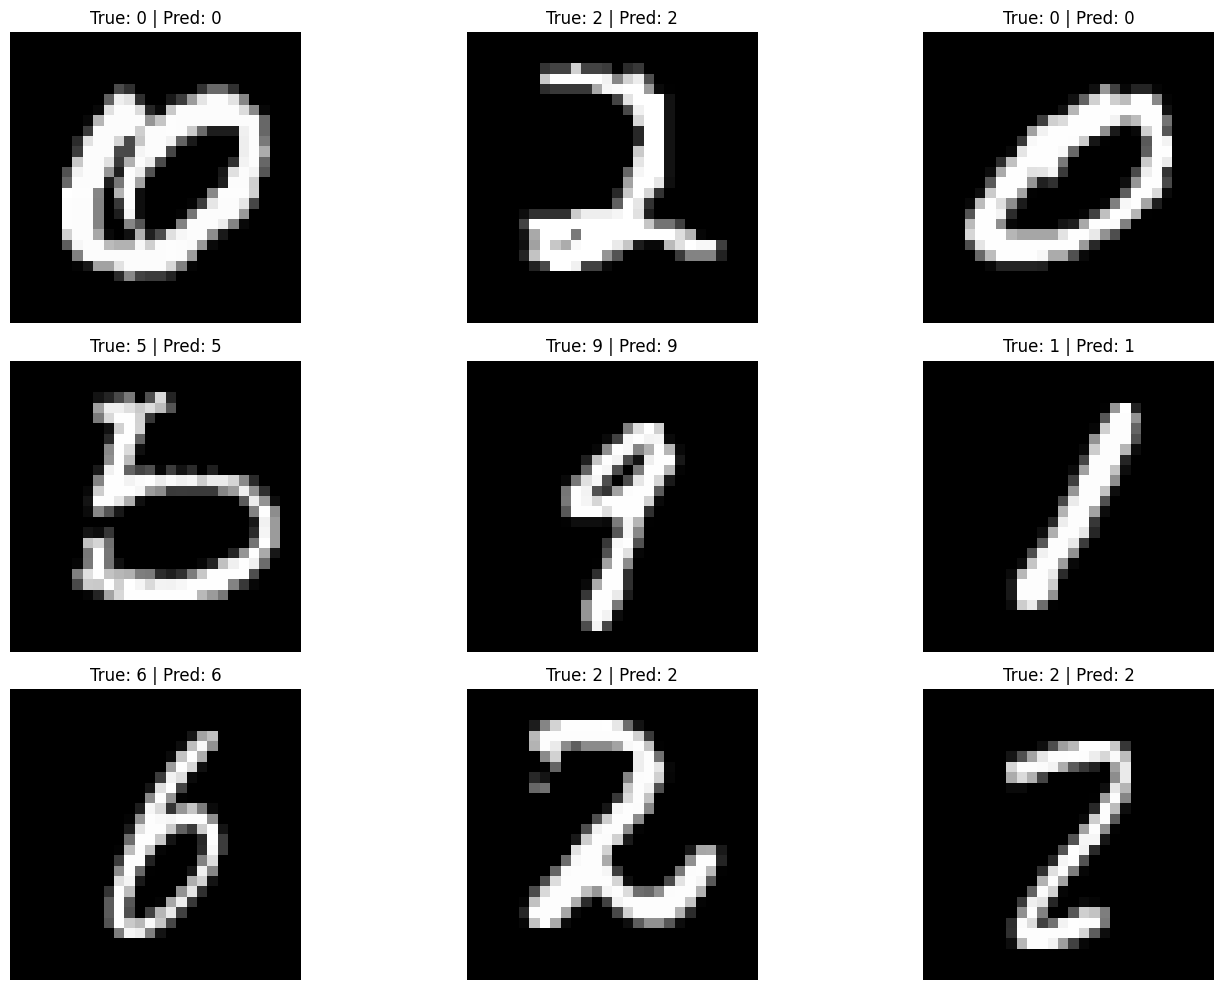

In [46]:
n = 9
samples_indices = np.random.choice(len(X_test), size=n, replace=False)
samples = X_test[samples_indices]
true_labels = np.argmax(y_test[samples_indices], axis=1)

predicted_probs = model.predict(samples)
predicted_labels = np.argmax(predicted_probs, axis=1)

plt.figure(figsize=(15, 10))
for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[i], cmap='gray')
    plt.title(f"True: {true_labels[i]} | Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Kernal size = 1**
**Padding different**

In [47]:
model = build_ConvLSTM1D_model(kernel_size=1, padding='valid')
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_2 (ConvLSTM1D)      │ (None, 28, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,458 (470.54 KB)

 Trainable params: 120,458 (470.54 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.6744 - loss: 0.9751 - val_accuracy: 0.9377 - val_loss: 0.1989
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9419 - loss: 0.1826 - val_accuracy: 0.9550 - val_loss: 0.1448
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9617 - loss: 0.1198 - val_accuracy: 0.9613 - val_loss: 0.1241
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9708 - loss: 0.0910 - val_accuracy: 0.9658 - val_loss: 0.1108
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9764 - loss: 0.0733 - val_accuracy: 0.9699 - val_loss: 0.1006
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9811 - loss: 0.0592 - val_accuracy: 0.9714 - val_loss: 0.0925
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9839 - loss: 0.0499 - val_accuracy: 0.9737 - val_loss: 0.0908
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9865 - loss: 0.

## `iii` Model Evaluation

In [50]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9709 - loss: 0.0956
Loss: 0.0770953819155693
Accuracy: 0.9757999777793884


## `iv` Result Visualization

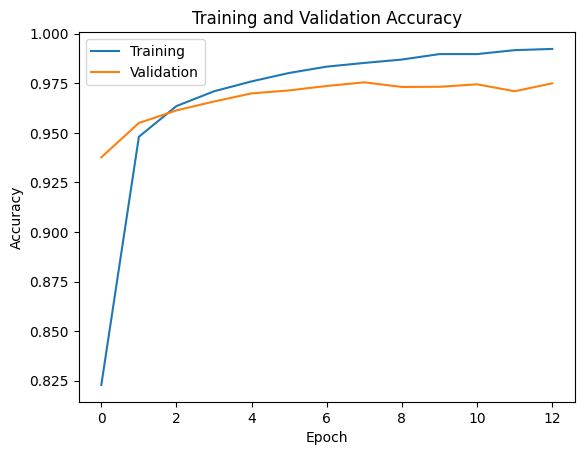

In [51]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

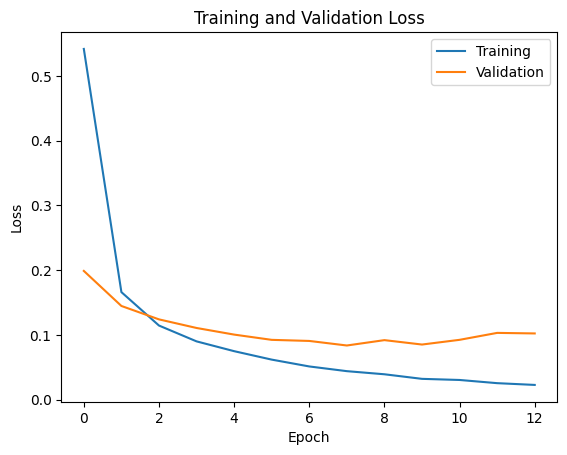

In [52]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step


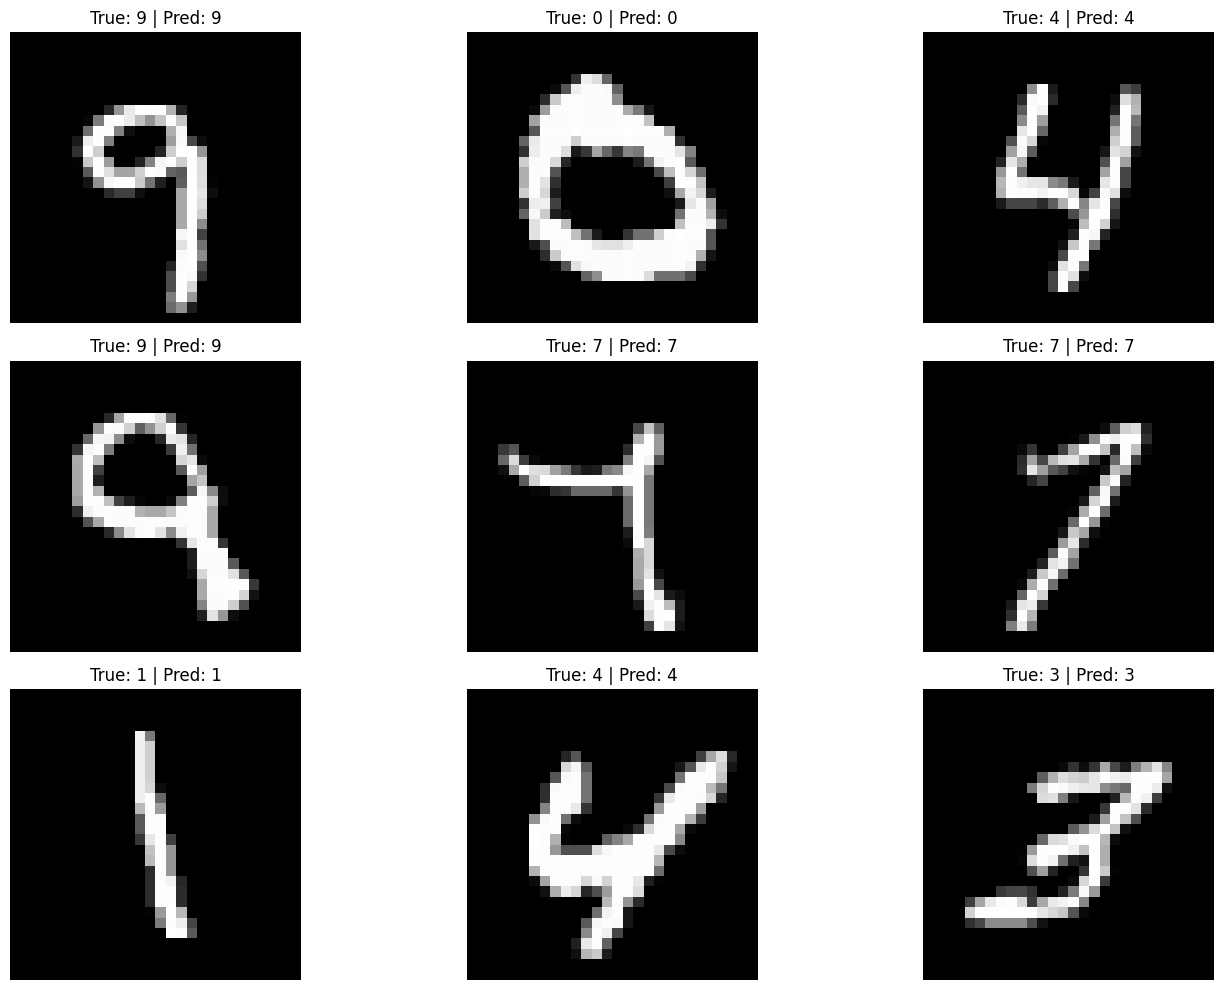

In [53]:
n = 9
samples_indices = np.random.choice(len(X_test), size=n, replace=False)
samples = X_test[samples_indices]
true_labels = np.argmax(y_test[samples_indices], axis=1)

predicted_probs = model.predict(samples)
predicted_labels = np.argmax(predicted_probs, axis=1)

plt.figure(figsize=(15, 10))
for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[i], cmap='gray')
    plt.title(f"True: {true_labels[i]} | Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Kernal size = 2**
**Padding same**

In [54]:
model = build_ConvLSTM1D_model(kernel_size=2, padding='same')
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_3 (ConvLSTM1D)      │ (None, 28, 32)         │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,682 (487.04 KB)

 Trainable params: 124,682 (487.04 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.7170 - loss: 0.8386 - val_accuracy: 0.9418 - val_loss: 0.1832
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9445 - loss: 0.1747 - val_accuracy: 0.9634 - val_loss: 0.1202
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9650 - loss: 0.1111 - val_accuracy: 0.9678 - val_loss: 0.1037
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9714 - loss: 0.0871 - val_accuracy: 0.9732 - val_loss: 0.0860
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9779 - loss: 0.0686 - val_accuracy: 0.9732 - val_loss: 0.0870
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9805 - loss: 0.0577 - val_accuracy: 0.9762 - val_loss: 0.0816
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9839 - loss: 0.0485 - val_accuracy: 0.9787 - val_loss: 0.0714
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9862 - loss: 0

## `iii` Model Evaluation

In [57]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9778 - loss: 0.0817
Loss: 0.06279908120632172
Accuracy: 0.9830999970436096


## `iv` Result Visualization

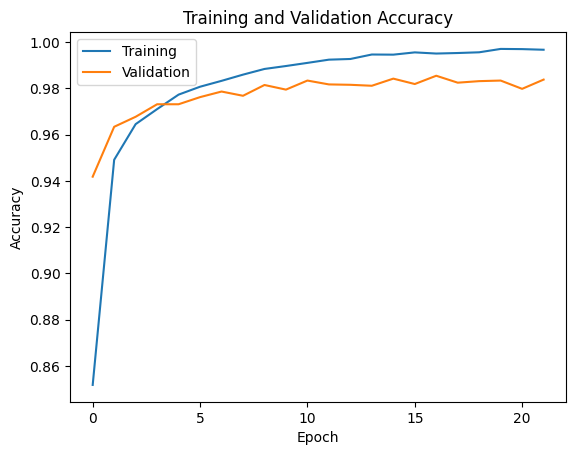

In [58]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

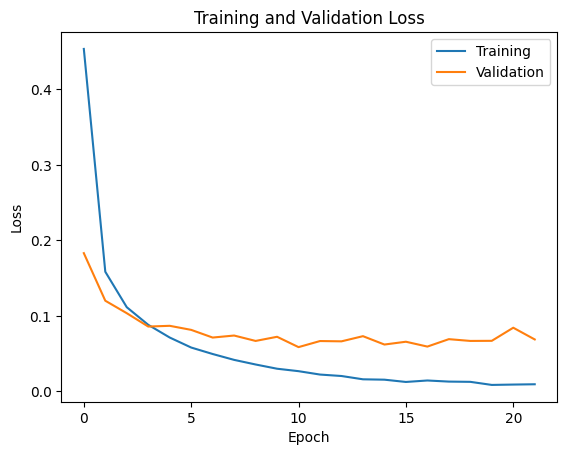

In [59]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


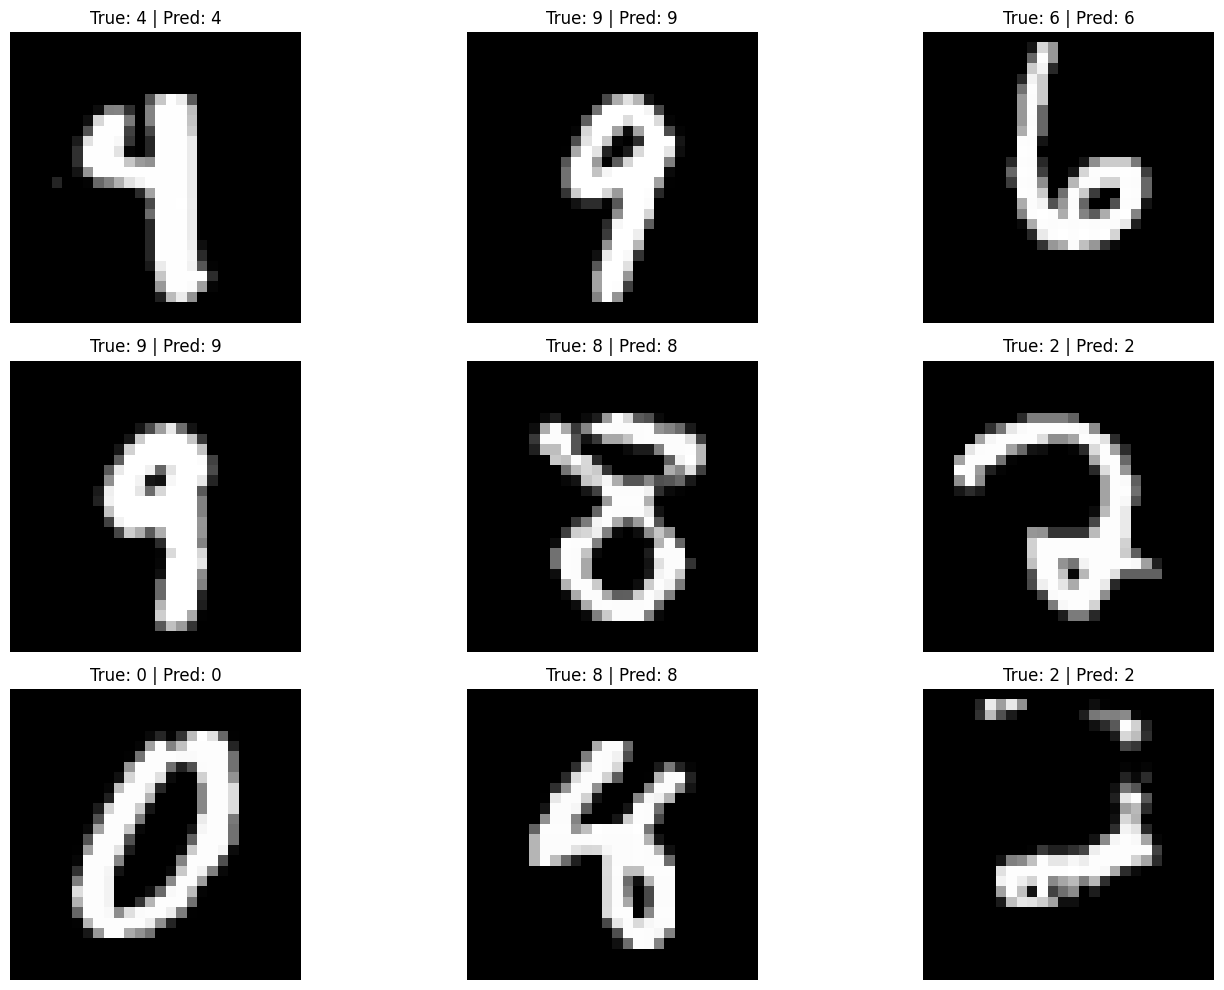

In [60]:
n = 9
samples_indices = np.random.choice(len(X_test), size=n, replace=False)
samples = X_test[samples_indices]
true_labels = np.argmax(y_test[samples_indices], axis=1)

predicted_probs = model.predict(samples)
predicted_labels = np.argmax(predicted_probs, axis=1)

plt.figure(figsize=(15, 10))
for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[i], cmap='gray')
    plt.title(f"True: {true_labels[i]} | Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Kernal size = 2**
**Padding different**

In [61]:
model = build_ConvLSTM1D_model(kernel_size=2, padding='valid')
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_4 (ConvLSTM1D)      │ (None, 28, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,458 (470.54 KB)

 Trainable params: 120,458 (470.54 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.6694 - loss: 1.0000 - val_accuracy: 0.9280 - val_loss: 0.2321
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9354 - loss: 0.2076 - val_accuracy: 0.9512 - val_loss: 0.1623
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9530 - loss: 0.1473 - val_accuracy: 0.9555 - val_loss: 0.1378
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9658 - loss: 0.1065 - val_accuracy: 0.9625 - val_loss: 0.1160
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9709 - loss: 0.0897 - val_accuracy: 0.9672 - val_loss: 0.1034
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9768 - loss: 0.0694 - val_accuracy: 0.9678 - val_loss: 0.1005
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9811 - loss: 0.0618 - val_accuracy: 0.9722 - val_loss: 0.0927
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9838 - loss: 0.

## `iii` Model Evaluation

In [64]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9736 - loss: 0.1177
Loss: 0.09291645884513855
Accuracy: 0.9790999889373779


## `iv` Result Visualization

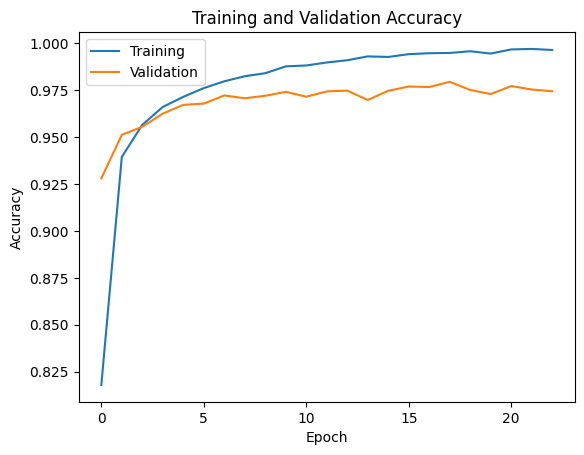

In [65]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

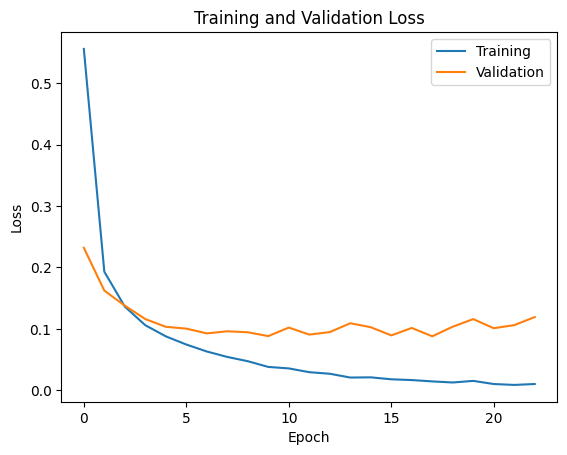

In [66]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


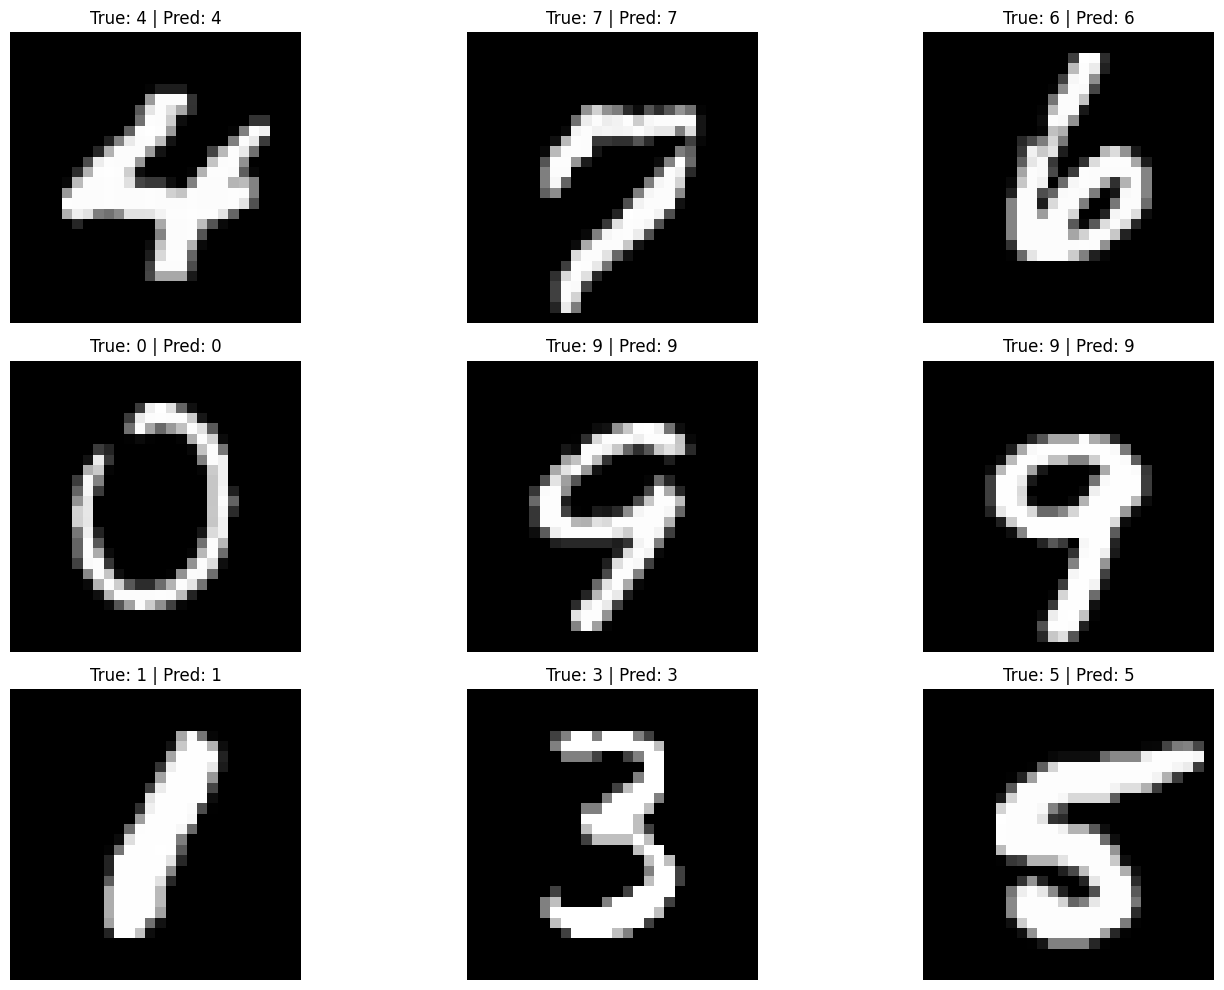

In [67]:
n = 9
samples_indices = np.random.choice(len(X_test), size=n, replace=False)
samples = X_test[samples_indices]
true_labels = np.argmax(y_test[samples_indices], axis=1)

predicted_probs = model.predict(samples)
predicted_labels = np.argmax(predicted_probs, axis=1)

plt.figure(figsize=(15, 10))
for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[i], cmap='gray')
    plt.title(f"True: {true_labels[i]} | Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Kernal size = 3**
**Padding same**

In [68]:
model = build_ConvLSTM1D_model(kernel_size=3, padding='same')
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_5 (ConvLSTM1D)      │ (None, 28, 32)         │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,906 (503.54 KB)

 Trainable params: 128,906 (503.54 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.7641 - loss: 0.7091 - val_accuracy: 0.9546 - val_loss: 0.1521
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9569 - loss: 0.1376 - val_accuracy: 0.9684 - val_loss: 0.0994
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9732 - loss: 0.0850 - val_accuracy: 0.9672 - val_loss: 0.1007
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9784 - loss: 0.0675 - val_accuracy: 0.9803 - val_loss: 0.0689
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9831 - loss: 0.0527 - val_accuracy: 0.9819 - val_loss: 0.0621
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9874 - loss: 0.0372 - val_accuracy: 0.9806 - val_loss: 0.0652
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9894 - loss: 0.0319 - val_accuracy: 0.9751 - val_loss: 0.0831
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9902 - loss: 0

## `iii` Model Evaluation

In [71]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9803 - loss: 0.0686
Loss: 0.05541238561272621
Accuracy: 0.9843999743461609


## `iv` Result Visualization

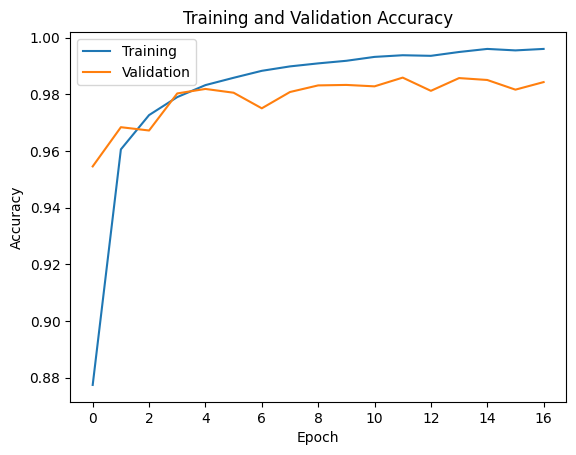

In [72]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

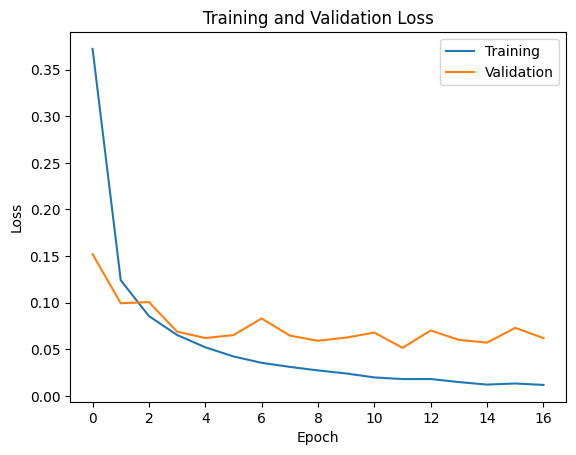

In [73]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


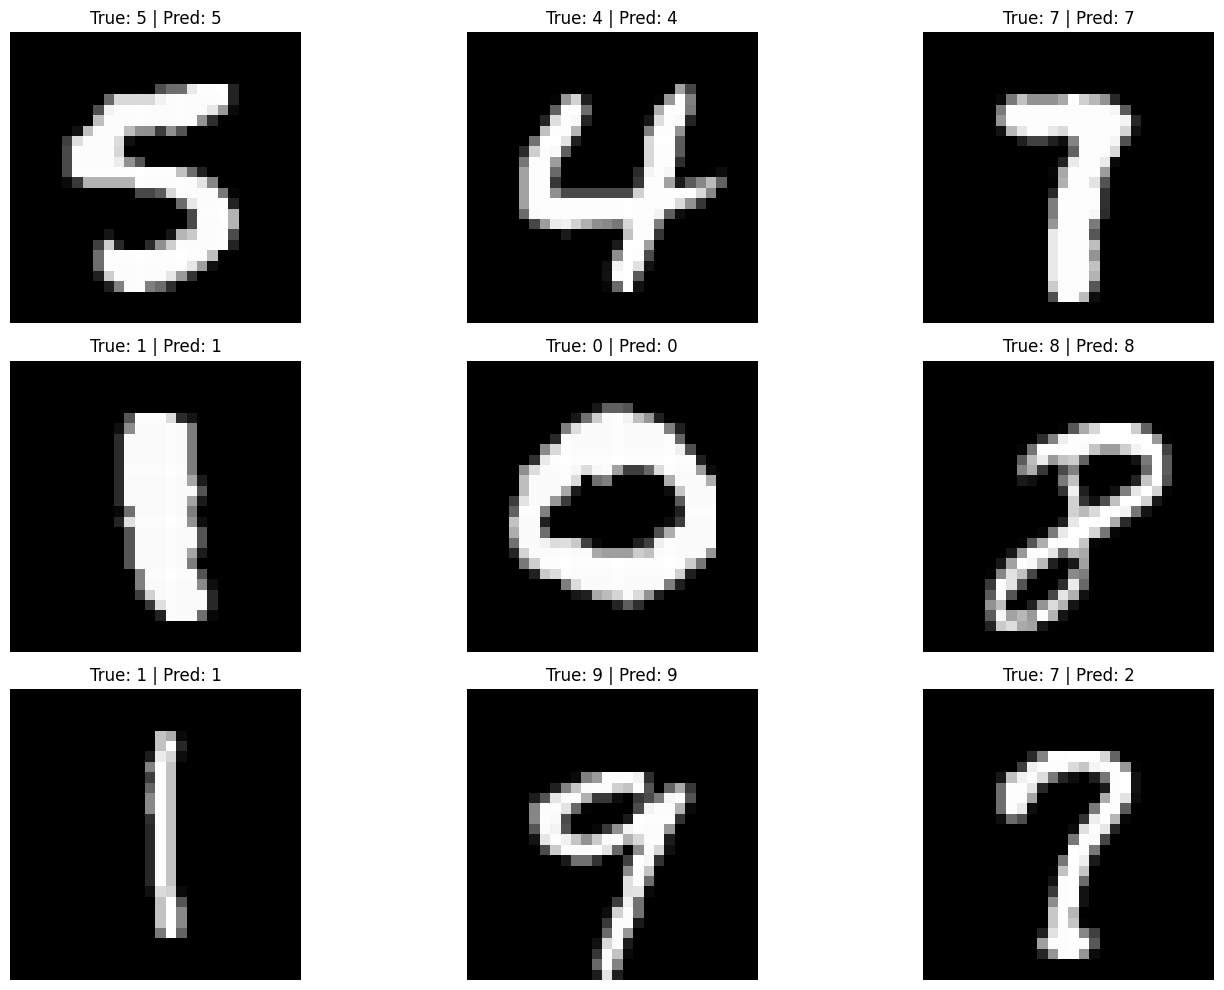

In [74]:
n = 9
samples_indices = np.random.choice(len(X_test), size=n, replace=False)
samples = X_test[samples_indices]
true_labels = np.argmax(y_test[samples_indices], axis=1)

predicted_probs = model.predict(samples)
predicted_labels = np.argmax(predicted_probs, axis=1)

plt.figure(figsize=(15, 10))
for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[i], cmap='gray')
    plt.title(f"True: {true_labels[i]} | Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Kernal size = 3**
**Padding different**

In [75]:
model = build_ConvLSTM1D_model(kernel_size=3, padding='valid')
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_8 (Rescaling)         │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_6 (ConvLSTM1D)      │ (None, 26, 32)         │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 832)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       106,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,714 (471.54 KB)

 Trainable params: 120,714 (471.54 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.7398 - loss: 0.7804 - val_accuracy: 0.9367 - val_loss: 0.2104
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9502 - loss: 0.1607 - val_accuracy: 0.9653 - val_loss: 0.1157
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9715 - loss: 0.0947 - val_accuracy: 0.9690 - val_loss: 0.1005
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9778 - loss: 0.0710 - val_accuracy: 0.9782 - val_loss: 0.0762
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9832 - loss: 0.0556 - val_accuracy: 0.9773 - val_loss: 0.0733
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9861 - loss: 0.0437 - val_accuracy: 0.9803 - val_loss: 0.0665
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9847 - loss: 0.0455 - val_accuracy: 0.9805 - val_loss: 0.0629
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9890 - loss: 0

## `iii` Model Evaluation

In [78]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9838 - loss: 0.0725
Loss: 0.05593559145927429
Accuracy: 0.9869999885559082


## `iv` Result Visualization

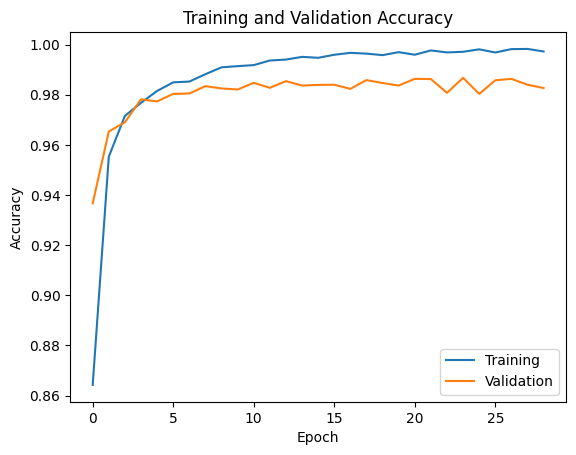

In [79]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

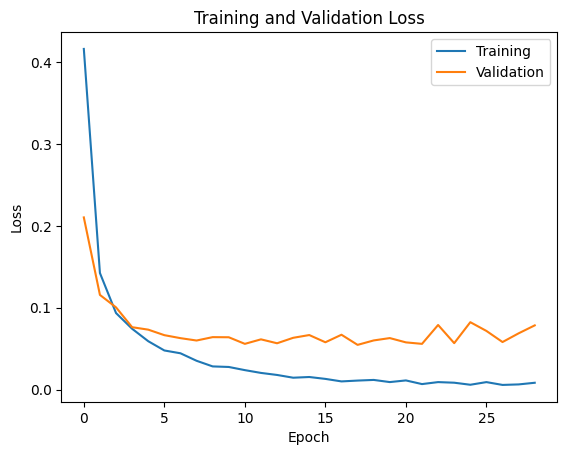

In [80]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


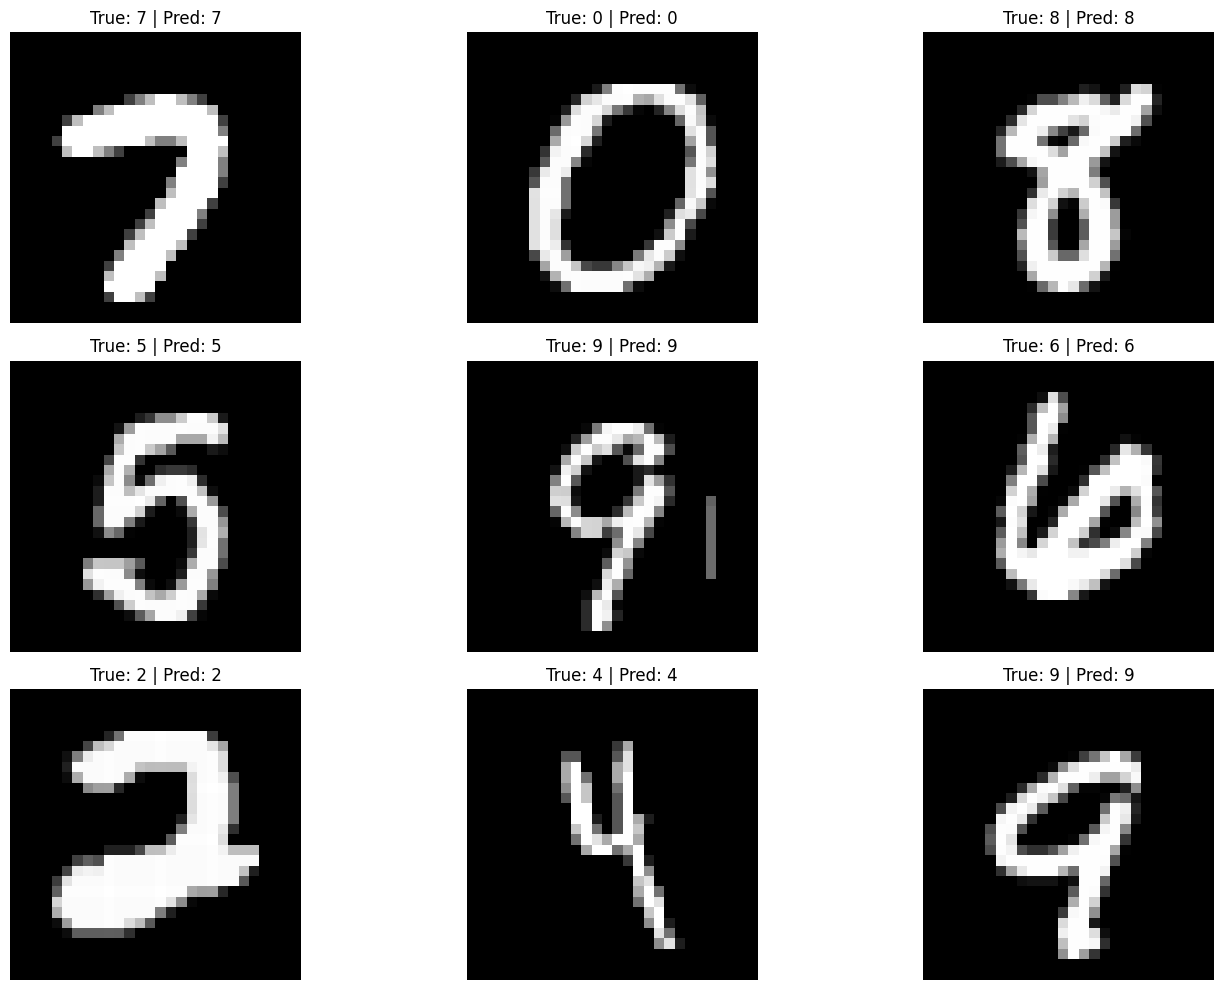

In [81]:
n = 9
samples_indices = np.random.choice(len(X_test), size=n, replace=False)
samples = X_test[samples_indices]
true_labels = np.argmax(y_test[samples_indices], axis=1)

predicted_probs = model.predict(samples)
predicted_labels = np.argmax(predicted_probs, axis=1)

plt.figure(figsize=(15, 10))
for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[i], cmap='gray')
    plt.title(f"True: {true_labels[i]} | Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()